# 前置步驟

### 初始化設定

In [6]:
import _init_paths
import argparse
import numpy as np
from lib.config import cfg
from lib.common.bboxInfoPredictor import bboxInfoPredictor
from lib.config import update_config
update_config(cfg)

test_videos = ["infant_60.mov", "infant2_60.mp4", "infant3_48.mov", "infant4_48.mov", "infant5_48.mov"]

### 預測人體box

In [7]:
for video in test_videos:
    bbox = bboxInfoPredictor(video)
    bbox.predict()

cuda
predict Video bboxes...
getVideoFrames finished


  0%|          | 0/2759 [00:00<?, ?it/s]/home/biolab/anaconda3/envs/Wei_env/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
 12%|█▏        | 324/2759 [00:21<02:43, 14.86it/s]


KeyboardInterrupt: 

### 預測關節點

In [ ]:
from lib.common.keypointPredictor import keypointPredictor

for video in test_videos:
    k = keypointPredictor(video)
    k.predict()

### 讀取已預測完之關節點

In [8]:
from lib.common.humanKeypoints import humanKeypoints

videoKeypoints = [humanKeypoints]
videoKeypoints.clear()
for video in test_videos:
    keypoints = humanKeypoints(video)
    videoKeypoints.append(keypoints)

In [29]:
print(f"videoName:{videoKeypoints[0].getVideoName()}")
print(f"milestone:{videoKeypoints[0].getMilestone()}")
print(f"keypoints:{videoKeypoints[0].getKeypoints()}")

videoName:infant_60.mov
milestone:60
keypoints:      framesKey                                          keypoints
0             0  [[0.41046415282940135, 0.32389177471419084], [...
1             1  [[0.4079837601667292, 0.32625829999183076], [0...
2             2  [[0.4012392797560894, 0.32815406814471393], [0...
3             3  [[0.4112488078479107, 0.3275953894651734], [0....
4             4  [[0.4085910289626686, 0.3260735570677381], [0....
...         ...                                                ...
2754       2754  [[0.39332375600842717, 0.22139824498591865], [...
2755       2755  [[0.38306750926797795, 0.22220288870076044], [...
2756       2756  [[0.3844087974441409, 0.22036005291249197], [0...
2757       2757  [[0.38590019821771643, 0.2192571936383631], [0...
2758       2758  [[0.39478802670224084, 0.21853368895836464], [...

[2759 rows x 2 columns]


## 視覺化呈現數據

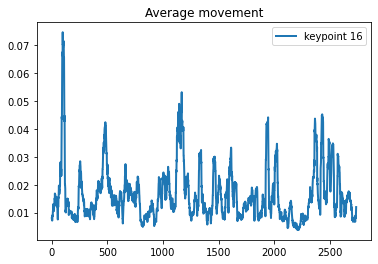

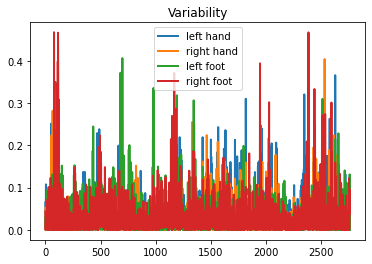

In [5]:
from lib.common.visualization import visualization

v = visualization(videoKeypoints[0])
v.draw_average_movement()
v.draw_variability()